In [30]:
# แยกว่าเป็นผลไม้ชนิดไหน


In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [32]:
# X คือ Feature คือคุณลักษนะเด่น ตย. นี้คือขนาด
X = [
    [27],
    [35],
    [39],
    [21],
    [22],
    [45],
]
y_name = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange']
y = [0, 1, 1, 0, 0, 1]  # y คือ Class/Target/Label หรือ Output


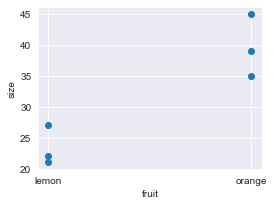

In [33]:
plt.figure(figsize=(4, 3))
plt.xlabel('fruit')
plt.ylabel('size')
plt.scatter(y_name, X)
plt.show()

In [34]:
model = DecisionTreeClassifier()
model.fit(X, y)  # train ด้วยข้อมูล

DecisionTreeClassifier()

In [35]:
# prediction หรือ ทำนาย

data = [[25]]  # input
y_predict = model.predict(data)
print('Result = ', y_predict)

Result =  [0]


In [36]:
# แสดง result ในรูปแบบของ string
class_names = ['lemon', 'orange']
print('Result =', class_names[y_predict[0]])

Result = lemon


In [37]:
# input แบบหลายค่า
data = [
    [32],
    [25],
    [21],
    [38],
]

y_predict = model.predict(data)
for i in y_predict:
    print('Result =', class_names[i])

Result = orange
Result = lemon
Result = lemon
Result = orange
